# Project Description

This notebook is designed to construct and evaluate a logistic regression model for the classification of breast cancer cells as benign or malignant. The dataset used is the Breast Cancer Wisconsin (Diagnostic) Dataset, which includes features computed from a digitized image of a fine needle aspirate (FNA) of a breast mass.

# Get The Data

dataset: https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic 

See `data/wdbc.names` for data description

In [58]:
import pandas as pd


data_file = 'data/wdbc.data'

columns = ['ID', 'Diagnosis',
           'Radius_mean', 'Texture_mean', 'Perimeter_mean', 'Area_mean', 'Smoothness_mean', 'Compactness_mean', 
           'Concavity_mean', 'Concave_points_mean', 'Symmetry_mean', 'Fractal_dimension_mean',
           'Radius_se', 'Texture_se', 'Perimeter_se', 'Area_se', 'Smoothness_se', 'Compactness_se', 
           'Concavity_se', 'Concave_points_se', 'Symmetry_se', 'Fractal_dimension_se',
           'Radius_worst', 'Texture_worst', 'Perimeter_worst', 'Area_worst', 'Smoothness_worst', 'Compactness_worst', 
           'Concavity_worst', 'Concave_points_worst', 'Symmetry_worst', 'Fractal_dimension_worst']
wdbc_df = pd.read_csv(data_file, header=None, names=columns)

wdbc_df.head()

,ID,Diagnosis,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Concave_points_mean,...,Radius_worst,Texture_worst,Perimeter_worst,Area_worst,Smoothness_worst,Compactness_worst,Concavity_worst,Concave_points_worst,Symmetry_worst,Fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [59]:
wdbc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       569 non-null    int64  
 1   Diagnosis                569 non-null    object 
 2   Radius_mean              569 non-null    float64
 3   Texture_mean             569 non-null    float64
 4   Perimeter_mean           569 non-null    float64
 5   Area_mean                569 non-null    float64
 6   Smoothness_mean          569 non-null    float64
 7   Compactness_mean         569 non-null    float64
 8   Concavity_mean           569 non-null    float64
 9   Concave_points_mean      569 non-null    float64
 10  Symmetry_mean            569 non-null    float64
 11  Fractal_dimension_mean   569 non-null    float64
 12  Radius_se                569 non-null    float64
 13  Texture_se               569 non-null    float64
 14  Perimeter_se             5

### Notes

- From my initial inspection fo the data, It looks like I should be predicting the 'Diagnosis' column, which is categorical.
- There are no null values to deal with.
- All other columns are numerical.

# Visualizing the data

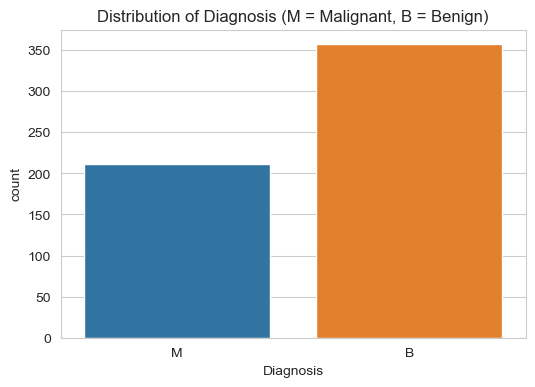

In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

# distribution of the 'Diagnosis' column
plt.figure(figsize=(6, 4))
sns.countplot(data=wdbc_df, x='Diagnosis')
plt.title('Distribution of Diagnosis (M = Malignant, B = Benign)')
plt.show()



array([[<Axes: title={'center': 'Radius_mean'}>,
        <Axes: title={'center': 'Texture_mean'}>,
        <Axes: title={'center': 'Perimeter_mean'}>],
       [<Axes: title={'center': 'Area_mean'}>,
        <Axes: title={'center': 'Smoothness_mean'}>, <Axes: >]],
      dtype=object)

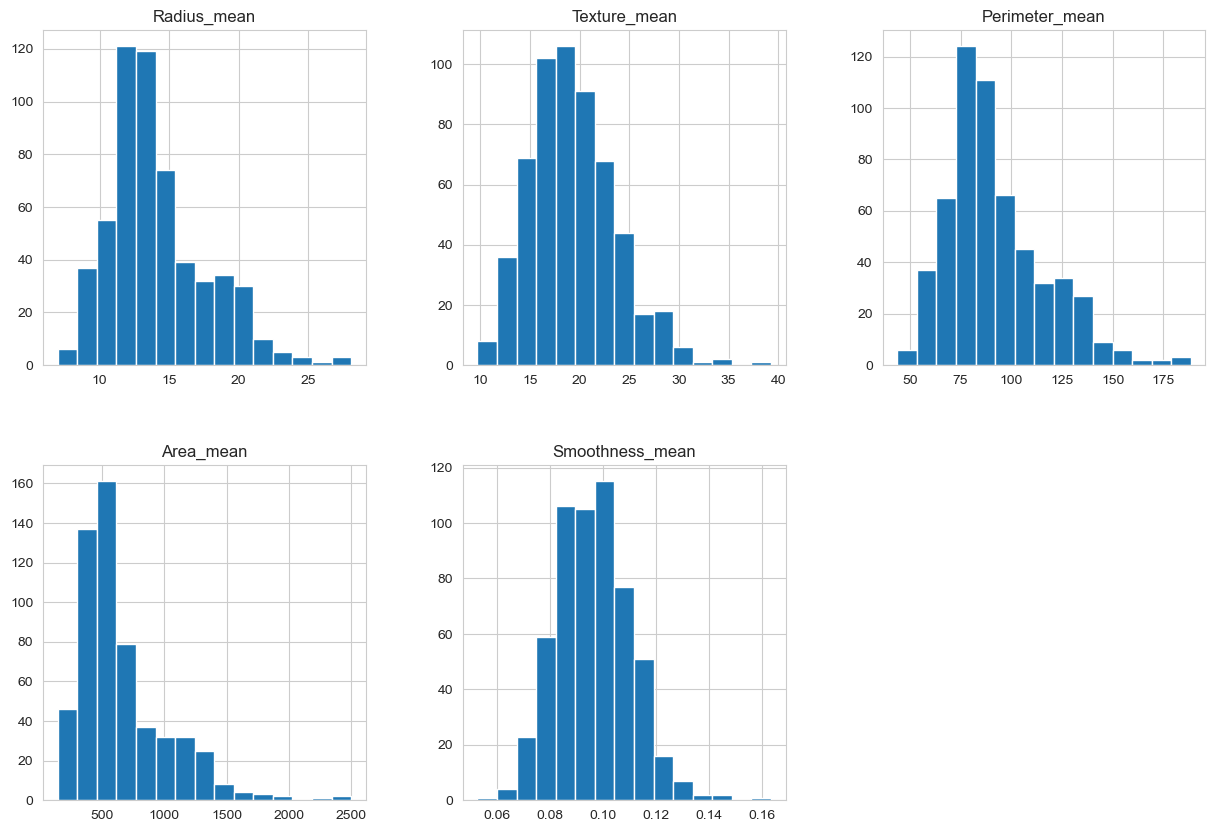

In [61]:
# histograms for some of the features
features_to_plot = ['Radius_mean', 'Texture_mean', 'Perimeter_mean', 'Area_mean', 'Smoothness_mean']
wdbc_df[features_to_plot].hist(bins=15, figsize=(15, 10), layout=(2, 3))

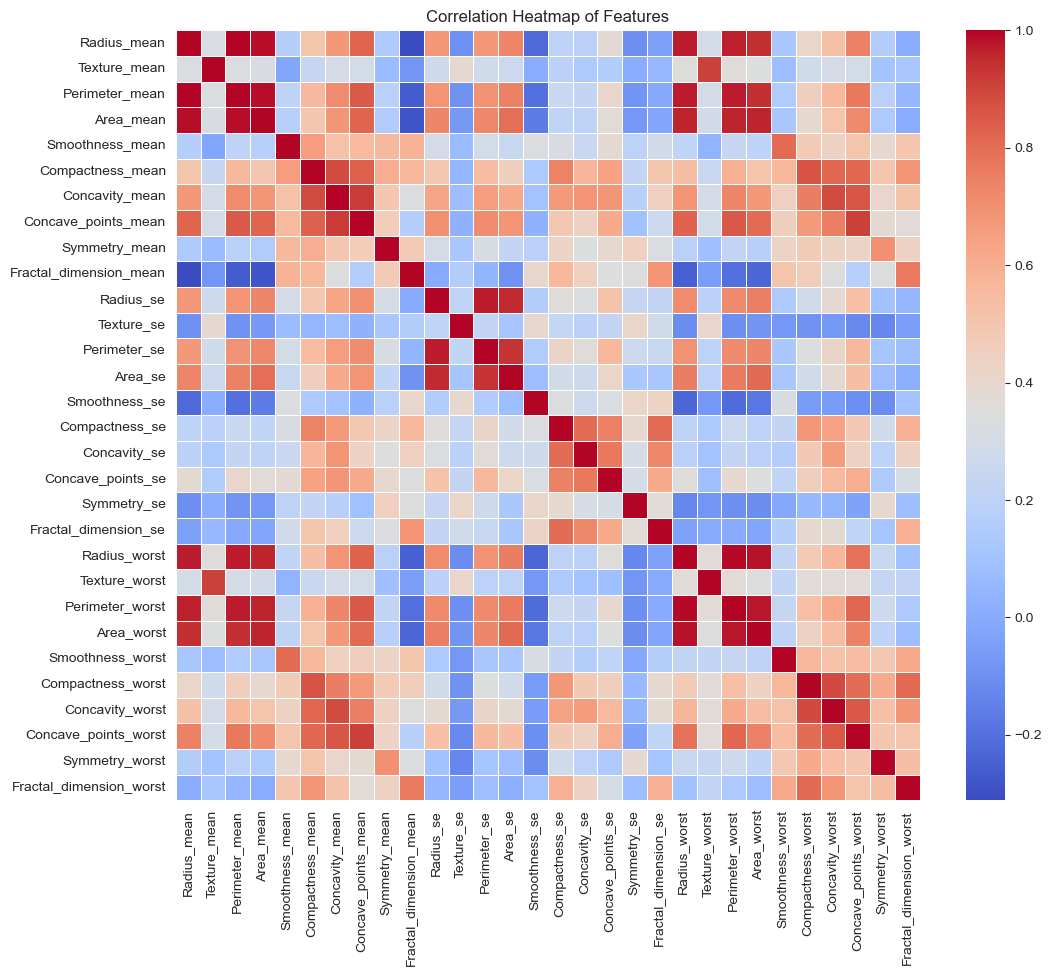

In [62]:
# heatmap
plt.figure(figsize=(12, 10))
correlation_matrix = wdbc_df.iloc[:, 2:].corr()  # exclude 'ID' and 'Diagnosis' for the correlation matrix
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap of Features')
plt.show()

# Preprocessing
- Encode 'Diagnosis' to numerical
- Drop the ID column (not needed)
- Perform feature scaling 

In [63]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Encode the 'Diagnosis' column to numerical values
# 1 = Malignant, 0 = Benign
label_encoder = LabelEncoder()
wdbc_df['Diagnosis'] = label_encoder.fit_transform(wdbc_df['Diagnosis'])

# Drop the 'ID' column
data_prepared = wdbc_df.drop(['ID'], axis=1)

# Perform feature scaling
scaler = StandardScaler()
features = data_prepared.iloc[:, 1:]  # exclude the 'Diagnosis' column
features_scaled = scaler.fit_transform(features)

# Update the DataFrame with the scaled features
data_prepared.iloc[:, 1:] = features_scaled

data_prepared.head()


,Diagnosis,Radius_mean,Texture_mean,Perimeter_mean,Area_mean,Smoothness_mean,Compactness_mean,Concavity_mean,Concave_points_mean,Symmetry_mean,...,Radius_worst,Texture_worst,Perimeter_worst,Area_worst,Smoothness_worst,Compactness_worst,Concavity_worst,Concave_points_worst,Symmetry_worst,Fractal_dimension_worst
0,1,1.097064,-2.073335,1.269934,0.984375,1.568466,3.283515,2.652874,2.532475,2.217515,...,1.886690,-1.359293,2.303601,2.001237,1.307686,2.616665,2.109526,2.296076,2.750622,1.937015
1,1,1.829821,-0.353632,1.685955,1.908708,-0.826962,-0.487072,-0.023846,0.548144,0.001392,...,1.805927,-0.369203,1.535126,1.890489,-0.375612,-0.430444,-0.146749,1.087084,-0.243890,0.281190
2,1,1.579888,0.456187,1.566503,1.558884,0.942210,1.052926,1.363478,2.037231,0.939685,...,1.511870,-0.023974,1.347475,1.456285,0.527407,1.082932,0.854974,1.955000,1.152255,0.201391
3,1,-0.768909,0.253732,-0.592687,-0.764464,3.283553,3.402909,1.915897,1.451707,2.867383,...,-0.281464,0.133984,-0.249939,-0.550021,3.394275,3.893397,1.989588,2.175786,6.046041,4.935010
4,1,1.750297,-1.151816,1.776573,1.826229,0.280372,0.539340,1.371011,1.428493,-0.009560,...,1.298575,-1.466770,1.338539,1.220724,0.220556,-0.313395,0.613179,0.729259,-0.868353,-0.397100


# Train the model

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X = data_prepared.iloc[:, 1:]  # features
y = data_prepared.iloc[:, 0]  # target variable 'Diagnosis'

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=48)

logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)


LogisticRegression()

# Model evaluation

In [65]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

y_pred = logistic_model.predict(X_test)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

evaluation_metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall'],
    'Score': [accuracy, precision, recall]
})
conf_matrix_df = pd.DataFrame(conf_matrix, 
                              index=['Actual (Benign): ', 'Acutal (Malignant)'], 
                              columns=['Predicted (Benign)', 'Predicted (Malignant)'])

print(evaluation_metrics_df)
conf_matrix_df



      Metric     Score
0   Accuracy  0.982456
1  Precision  0.978261
2     Recall  0.978261


,Predicted (Benign),Predicted (Malignant)
Actual (Benign):,67,1
Acutal (Malignant),1,45
